In [46]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, precision_score, recall_score, f1_score, accuracy_score


In [47]:
extracted_data = pd.read_csv('../datasets/extracted_nba_players_data.csv')
extracted_data.head()

,fg,3p,ft,reb,ast,stl,blk,tov,target_5yrs,total_points,efficiency
0,34.7,25.0,69.9,4.1,1.9,0.4,0.4,1.3,0,266.4,0.270073
1,29.6,23.5,76.5,2.4,3.7,1.1,0.5,1.6,0,252.0,0.267658
2,42.2,24.4,67.0,2.2,1.0,0.5,0.3,1.0,0,384.8,0.339869
3,42.6,22.6,68.9,1.9,0.8,0.6,0.1,1.0,1,330.6,0.491379
4,52.4,0.0,67.4,2.5,0.3,0.3,0.4,0.8,1,216.0,0.391304


In [48]:
y = extracted_data["target_5yrs"]

X = extracted_data.drop(columns=["target_5yrs"], axis=1)

In [49]:
y.head()

0    0
1    0
2    0
3    1
4    1
Name: target_5yrs, dtype: int64

In [50]:
X.head()

,fg,3p,ft,reb,ast,stl,blk,tov,total_points,efficiency
0,34.7,25.0,69.9,4.1,1.9,0.4,0.4,1.3,266.4,0.270073
1,29.6,23.5,76.5,2.4,3.7,1.1,0.5,1.6,252.0,0.267658
2,42.2,24.4,67.0,2.2,1.0,0.5,0.3,1.0,384.8,0.339869
3,42.6,22.6,68.9,1.9,0.8,0.6,0.1,1.0,330.6,0.491379
4,52.4,0.0,67.4,2.5,0.3,0.3,0.4,0.8,216.0,0.391304


In [51]:
y.value_counts()

target_5yrs
1    831
0    509
Name: count, dtype: int64

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [53]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1005, 10), (1005,), (335, 10), (335,))

In [54]:
nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

In [55]:
print('Accuracy:', '%.3f' % accuracy_score(y_test, y_pred))
print('Precision:', '%.3f' % precision_score(y_test,y_pred))
print('Recall:', '%.3f' % recall_score(y_test, y_pred))
print('F1 Score:', '%.3f' % f1_score(y_test, y_pred))

Accuracy: 0.654
Precision: 0.838
Recall: 0.548
F1 Score: 0.663


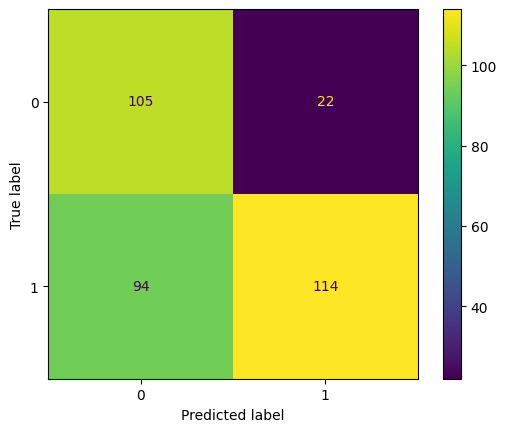

In [56]:
cm = confusion_matrix(y_test, y_pred, labels=nb.classes_)
display_matrix = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb.classes_)
display_matrix.plot()
plt.show()